In [127]:
import numpy as np
import matplotlib.pyplot as plt


In [121]:
# data generation
# payam's formulation

# generation of the data:

E = 2
de = 1
dc = 1
d = de + dc

muc = -1
sigc = 1

mue = [1,3]
# sigenv = np.array([[1,0],[0,3]])
sige = [1,3]
muTe = [3]
sigTe = [4]
f = np.array([[1,3],[0,1]])
phi = np.array([[1,-3],[0,1]])

n = 50

In [122]:
Z = np.zeros((0,d))
y = np.zeros((0,1))

# generating latent features
for i in range(len(mue)):
    ye = np.random.randint(0,2,(n,1)) * 2 -1
    Ze = np.random.randn(n, de) * sige[i] + ye * mue[i]
    Zc = np.random.randn(n, de) * sigc + ye * muc
    Znew = np.concatenate((Zc,Ze),axis=1)
    Z = np.concatenate((Z, Znew),axis=0)
    y = np.concatenate((y,ye), axis=0)

# generating data
X = Z.dot(f)

print(X)
print(y)

[[-0.56423017 -0.51672831]
 [ 0.52375367  0.84820621]
 [-2.18124736 -5.47466168]
 [ 1.44458524  4.74851163]
 [-1.21396251 -0.74081042]
 [-2.61004697 -6.76488356]
 [ 0.28038249  1.83562025]
 [ 1.15245     3.19997523]
 [ 0.10387922  1.527945  ]
 [ 1.99601172  5.93593614]
 [ 0.68584828  2.34810979]
 [ 1.03840438  1.66704103]
 [ 0.96072593  3.82225332]
 [-0.24048383 -1.65535179]
 [-0.07753319 -1.90663494]
 [ 1.78297406  5.27003823]
 [-0.09831268  0.81802017]
 [-1.24997468 -1.8955918 ]
 [ 0.60327826  0.25031998]
 [-2.35475977 -7.76984238]
 [ 1.47228407  3.24978863]
 [-0.05306293 -1.59315001]
 [-0.36576231 -0.55127255]
 [-0.65967418 -0.55686657]
 [-1.29228542 -3.51105695]
 [ 0.59649112  3.1815417 ]
 [-0.992984   -2.37557784]
 [ 0.45602812  1.31531954]
 [-0.39124447 -2.10234121]
 [ 1.71494763  5.17592687]
 [ 0.42352075 -0.08220245]
 [ 1.51815637  2.16469594]
 [ 2.39275124  7.27792943]
 [ 1.46738326  3.9389696 ]
 [ 1.22386152  1.2038815 ]
 [ 0.33437815  1.85873492]
 [-0.52178852 -2.54808821]
 

In [123]:
# generating test data in a new unseen environment
Zte = np.zeros((0,d))
yte = np.zeros((0,1))

# generating latent features
for i in range(len(muTe)):
    ye = np.random.randint(0,2,(n,1)) * 2 -1
    Ze = np.random.randn(n, de) * sigTe[i] + ye * muTe[i]
    Zc = np.random.randn(n, de) * sigc + ye * muc
    Znew = np.concatenate((Zc,Ze),axis=1)
    Zte = np.concatenate((Zte, Znew),axis=0)
    yte = np.concatenate((yte,ye), axis=0)

Xte = Zte.dot(f)
print(Zte.shape)
print(yte.shape)

(50, 2)
(50, 1)


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss
print(X.shape)
print(y.shape)
logreg = LogisticRegression()
logreg.fit(X,y)

(100, 2)
(100, 1)


/home/janez/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

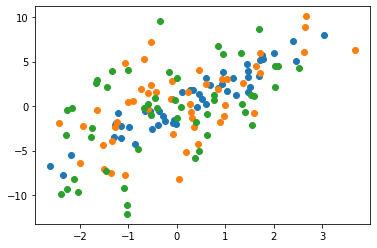

In [125]:
plt.scatter(X[0:50,0],X[0:50,1])
plt.scatter(X[50:-1,0],X[50:-1,1])
plt.scatter(Xte[:,0],Xte[:,1])

In [126]:
y_pred = logreg.predict(Xte)
zero_one_loss(yte, y_pred)

0.19999999999999996

In [ ]:
import numpy as np
from scipy.optimize import minimize

def objective(p):
    # phi = first 4
    # beta = next 2
    # mu = next 1
    return 